In [1]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import sedov
from fvhoe.solver import EulerSolver
from fvhoe.visualization import sample_circular_average
import matplotlib.pyplot as plt
import numpy as np
from sedov import sedov_rduP

In [2]:
# sedov blast params
t = 0.8
gamma = 1.4

In [3]:
# numerical solution
N = 64
p = 3

solver = EulerSolver(
    w0=partial(sedov, dims="x"),
    conservative_ic=True,
    fv_ic=True,
    x=(0, 1),
    y=(0, 1),
    gamma=gamma,
    bc=BoundaryCondition(x=("reflective", "outflow")),
    CFL=0.8,
    nx=N,
    px=p,
    riemann_solver="hllc",
    a_posteriori_slope_limiting=True,
    slope_limiter="minmod",
    NAD=1e-3,
    all_floors=True,
    snapshots_as_fv_averages=False,
    dumpall=True,
    cupy=False,
)
solver.rkorder(t)

/usr/local/Caskroom/miniconda/base/envs/fvhoe-env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/Caskroom/miniconda/base/envs/fvhoe-env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 0.8/0.8 [00:04]                  


In [4]:
# analytical solution
r, d, u, P = sedov_rduP(t=t, dim=1, gamma=gamma)

chi0=0.9754065475031871


t=0.8, x=[0.0078125, 0.9921875], y=0.5, z=0.5


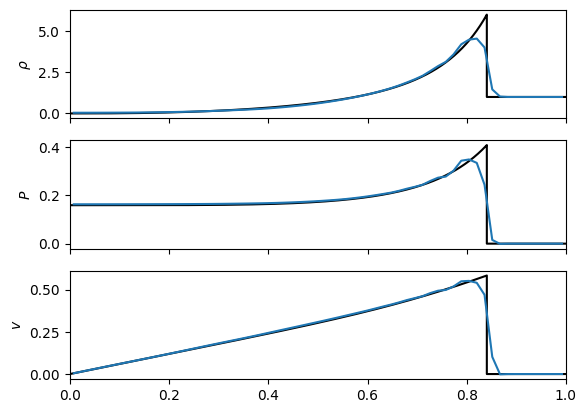

In [5]:
fig, ax = plt.subplots(3, 1, sharex=True)

# plot analytical solution
ax[0].set_ylabel(r"$\rho$")
ax[0].plot(r, d, "k")
ax[1].set_ylabel(r"$P$")
ax[1].plot(r, P, "k")
ax[2].set_ylabel(r"$v$")
ax[2].plot(r, u, "k")
ax[0].set_xlim(0, 1)

# plot numerical solution
slices = dict(y=0.5, z=0.5, t=t)
solver.plot_1d_slice(ax[0], param="rho", **slices)
solver.plot_1d_slice(ax[1], param="P", verbose=False, **slices)
solver.plot_1d_slice(ax[2], param="vx", verbose=False, **slices)